In [293]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<h2>STEP 1. Import packages and data</h2>

**1.1 Importing and viewing data**

In [294]:
df_train = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')


In [295]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [298]:
df_train.shape

(1460, 81)

In [300]:
# Import csv as pandas dataframe
#df = pd.read_csv('../input/train.csv')

df_raw=df_train
#df_raw=df_test

df_raw.info()

df_clean=df_raw.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [301]:
df_clean.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [302]:
df_clean.columns #list all the columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**1.2 Convert all strings into categorical variables**

In [303]:
# Group columsn by data types:
type_dct = {str(k): list(v) for k, v in df_clean.groupby(df_clean.dtypes, axis=1)}

for col in type_dct["object"]:
    df_clean[col] = df_clean[col].astype('category')

In [305]:
df_clean.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
                   ...   
BedroomAbvGr        int64
KitchenAbvGr        int64
KitchenQual      category
TotRmsAbvGrd        int64
Functional       category
Fireplaces          int64
FireplaceQu      category
GarageType  

In [321]:
#Check number of NaN values in each column

# List the number if NaN values in each column (in descending order):
df_clean.isnull().sum(axis = 0).sort_values(ascending=False)

# Find rows with missing values in certain column(s):
#df[df['Electrical'].isnull()]

#df_clean.loc[:,dfclean.isnull().any()]

# We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable 
# and pretend it never existed.

SalePrice        0
MasVnrArea       0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
OverallCond      0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
YearBuilt        0
OverallQual      0
SaleCondition    0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
Utilities        0
HouseStyle       0
LotConfig        0
LandSlope        0
                ..
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
3SsnPorch        0
1stFlrSF         0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageCars       0
GarageFinish     0
GarageYrBlt      0
GarageType       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr

In [316]:
#List unique values in certain columns:
df_clean["FireplaceQu"].value_counts(normalize=True,dropna=False) # show the ratio of the different values within the column

NaN    0.472792
Gd     0.283675
TA     0.191793
Fa     0.021409
Ex     0.018733
Po     0.011597
Name: FireplaceQu, dtype: float64

**1.3 Drop rows with too many NaN values**

In [306]:
#Remove row with NaN values in certain columns:
df_clean=df_clean.dropna(subset=["LotFrontage","GarageYrBlt","MasVnrArea"],axis=0)
df_clean.reset_index()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
8,9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
9,10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500


In [312]:
df_clean.shape

(1121, 81)

In [277]:
#Replace some values in column
# cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
#                 "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
#                                   "two": 2, "twelve": 12, "three":3 }}
# obj_df = obj_df.replace(cleanup_nums)

**Drop columns if they contain too many Nan values**

In [320]:
# Remove columns with too many NaN values- simply add col names in " "
#df_clean=df_clean.drop(["Rank","User_Score","Vgchartzscore","VGChartz_Score","url","status","Total_Shipped","Last_Update"],1)

# Drop columns where at least one values is missing
df_clean=df_clean.dropna(axis='columns')

#df_clean.dropna(thresh=len(df_clean), axis=1)
# checking Nan's in "price" column
#df_clean.price.isna().sum()

# Replace NaN sales values with 0s:
#gamesclean[["JP_Sales","NA_Sales","PAL_Sales","Other_Sales"]]=gamesclean[["JP_Sales","NA_Sales","PAL_Sales","Other_Sales"]].fillna(0)

#gamesclean=gamesclean.reset_index(drop=True)

**1.4 Dropping unnecessary columns**

In [282]:
# Do you believe we will miss this data??
columns_to_drop = ["LotFrontage","GarageYrBlt","MasVnrArea"]

df_clean.dropna(axis=0, subset=columns_to_drop, inplace=True) #drop column based on

# y = data.SalePrice
# X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
# train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

In [283]:
df_clean

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500


**1.5 Dealing with missing values**

In [284]:
#df_raw.isna().sum()

#df_raw.cleaning_fee.fillna('$0.00', inplace=True)
#df_raw.cleaning_fee.isna().sum()

**1.6 Outlier detection**

In [285]:
#I'm quite confident that these two points are not representative of the typical case. 
# Therefore, we'll define them as outliers and delete them.

**1.7 One-hot enconding for Categorical features**

In [322]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0 ,1])

# with drop_first=True it will also delete these columns and only keep the onehot enconded columns instead
onehot=pd.get_dummies(df_clean[type_dct["object"]],drop_first=True)

# Add the new dummy columns to the original dataframe
#df_clean = df_clean.join(onehot)

#Convert categorical variable into dummy variables
#df2=pd.get_dummies(df[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']])  

KeyError: "['BsmtFinType2', 'Electrical', 'Alley', 'BsmtQual', 'Fence', 'PoolQC', 'BsmtFinType1', 'MiscFeature', 'FireplaceQu', 'BsmtCond', 'BsmtExposure'] not in index"

In [287]:
onehot.head()

# List the number if NaN values in each column (in descending order):
onehot.isnull().sum(axis = 0).sort_values(ascending=False)


SaleCondition_Partial    0
Exterior2nd_Other        0
RoofMatl_Membran         0
RoofMatl_CompShg         0
RoofStyle_Shed           0
RoofStyle_Mansard        0
RoofStyle_Hip            0
RoofStyle_Gambrel        0
RoofStyle_Gable          0
HouseStyle_SLvl          0
HouseStyle_SFoyer        0
HouseStyle_2Story        0
HouseStyle_2.5Unf        0
HouseStyle_2.5Fin        0
HouseStyle_1Story        0
HouseStyle_1.5Unf        0
BldgType_TwnhsE          0
BldgType_Twnhs           0
BldgType_Duplex          0
BldgType_2fmCon          0
Condition2_RRNn          0
Condition2_RRAn          0
Condition2_RRAe          0
Condition2_PosN          0
Condition2_PosA          0
RoofMatl_Metal           0
RoofMatl_Roll            0
RoofMatl_Tar&Grv         0
Exterior1st_Stucco       0
Exterior2nd_ImStucc      0
                        ..
Exterior2nd_Wd Sdng      0
Exterior2nd_VinylSd      0
Exterior2nd_Stucco       0
BsmtCond_Gd              0
BsmtCond_TA              0
Electrical_FuseF         0
B

In [288]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 81 columns):
Id               1121 non-null int64
MSSubClass       1121 non-null int64
MSZoning         1121 non-null category
LotFrontage      1121 non-null float64
LotArea          1121 non-null int64
Street           1121 non-null category
Alley            77 non-null category
LotShape         1121 non-null category
LandContour      1121 non-null category
Utilities        1121 non-null category
LotConfig        1121 non-null category
LandSlope        1121 non-null category
Neighborhood     1121 non-null category
Condition1       1121 non-null category
Condition2       1121 non-null category
BldgType         1121 non-null category
HouseStyle       1121 non-null category
OverallQual      1121 non-null int64
OverallCond      1121 non-null int64
YearBuilt        1121 non-null int64
YearRemodAdd     1121 non-null int64
RoofStyle        1121 non-null category
RoofMatl         1121 non-null catego

**Split data into Dependent and Independent variables (Last step of Cleaning)**

In [323]:
# Transform the Target variable
y = np.log(df_clean[["SalePrice"]])

In [340]:
#SPLIT DATA INTO TARGET AND FEATURES

# Define our target
#y = np.log(df_clean[["SalePrice"]])
# +later I will transform y to log(y)

# Define our features 

# Group columsn by data types:
#type_dct = {str(k): list(v) for k, v in df_clean.groupby(df_clean.dtypes, axis=1)}

#cols = (type_dct["int64"]+type_dct["float64"]+type_dct["uint8"]) #all columns containing numeric data
cols = (type_dct["int64"]+type_dct["float64"])

X = df_clean[cols].drop(["SalePrice","Id"], axis=1) #drop the target variable


<h2>3. Exploratory data analysis</h2>

In [139]:
df["column1"].value_counts(normalize=True) # show the ratio of the different values within the column

KeyError: 'column1'

**Scatter plots**

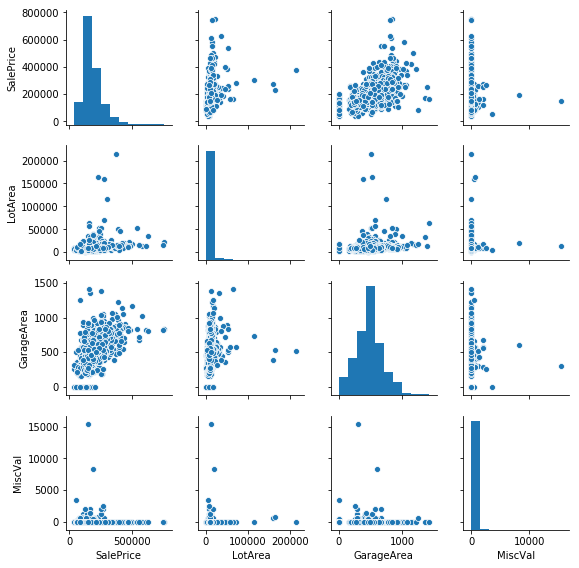

In [140]:
# Show scatter plots between each variable (with too many columns the it could get messy!!!)
# but in general it is a good way to visualize relationship between two variables. e.g easy to spot linearity
import seaborn as sns

cols=["SalePrice","LotArea","GarageArea","MiscVal"]
sns.pairplot(df_clean[cols], height=2.0)

**Histograms/Density plots**

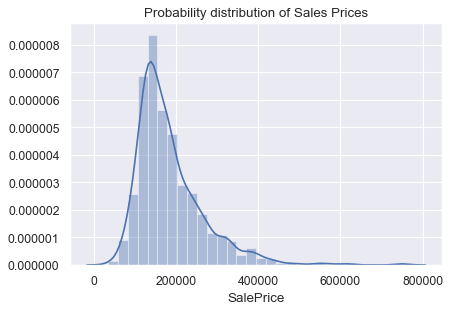

In [41]:
from matplotlib.pyplot import figure

plt.figure(figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(df_clean['SalePrice'],bins=30)
plt.title("Probability distribution of Sales Prices")
plt.show()

# can I run it for multiple and and display it in subplots?

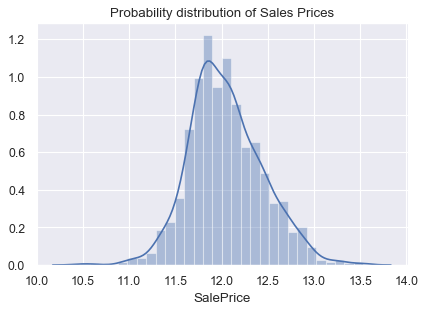

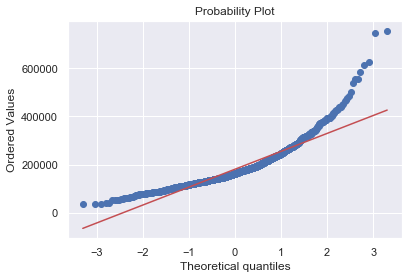

In [69]:
#Often when the target variable is skewed and not follows normal distribution it isa  good idea to log() transform it
y = np.log(df_clean['SalePrice'])

#Show distribution of log transformed variable
plt.figure(figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(y,bins=30)
plt.title("Probability distribution of Sales Prices")
plt.show()

# PROBABILITY PLOT
#transformed histogram and normal probability plot
#sns.distplot(df_train['SalePrice'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [167]:
df_clean['SalePrice'].median()

163000.0

In [ ]:
#Comparing two density plots:
ax =sns.distplot(converted[‘age’],hist=False,color=’blue’,kde_kws={‘shade’:True},norm_hist=True,label=’converted’)
ax = sns.distplot(not_converted[‘age’],hist=False,color=’red’,kde_kws={‘shade’:True},norm_hist=True,label=’not converted’)
ax.set_title(‘age distribution ‘)

**Boxplots**

In [ ]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

df.boxplot(column='price', by='neighbourhood_group_cleansed', 
           flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

In [190]:
print(type_dct["int64"]+type_dct["float64"])

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']


**One-hot encoding**

**HEAT MAP for Correlation between variables**

In [ ]:
cov_mat =np.corr(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

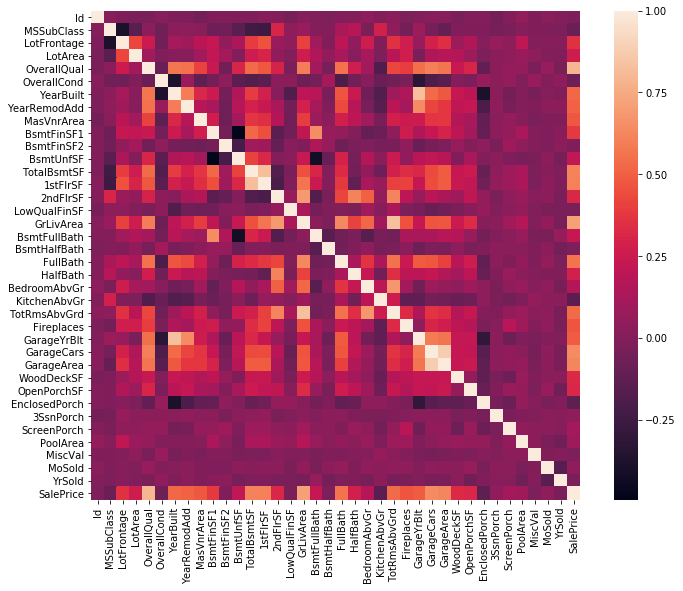

In [19]:
#correlation matrix
corrmat = df_clean.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Check for multicollinearity
# this correlation is so strong that it can indicate a situation of multicollinearity. 
# If we think about these variables, we can conclude that they give almost the same information 
# so multicollinearity really occurs.

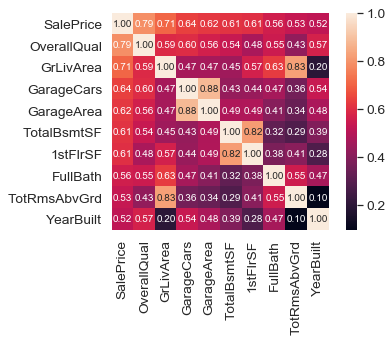

In [20]:
# Correlation with the target variable

#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index #returns the 10 largest correlation with the 'SalePrice'
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


# when two Independent variables are heavily correlated (>0.75), we should only keep one of them, since they contain more or less the 
# the same information, we can not distinguish between the two.

**Scatter plots between target and most important features** 

C:\Users\Peter\Anaconda3\envs\py35\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


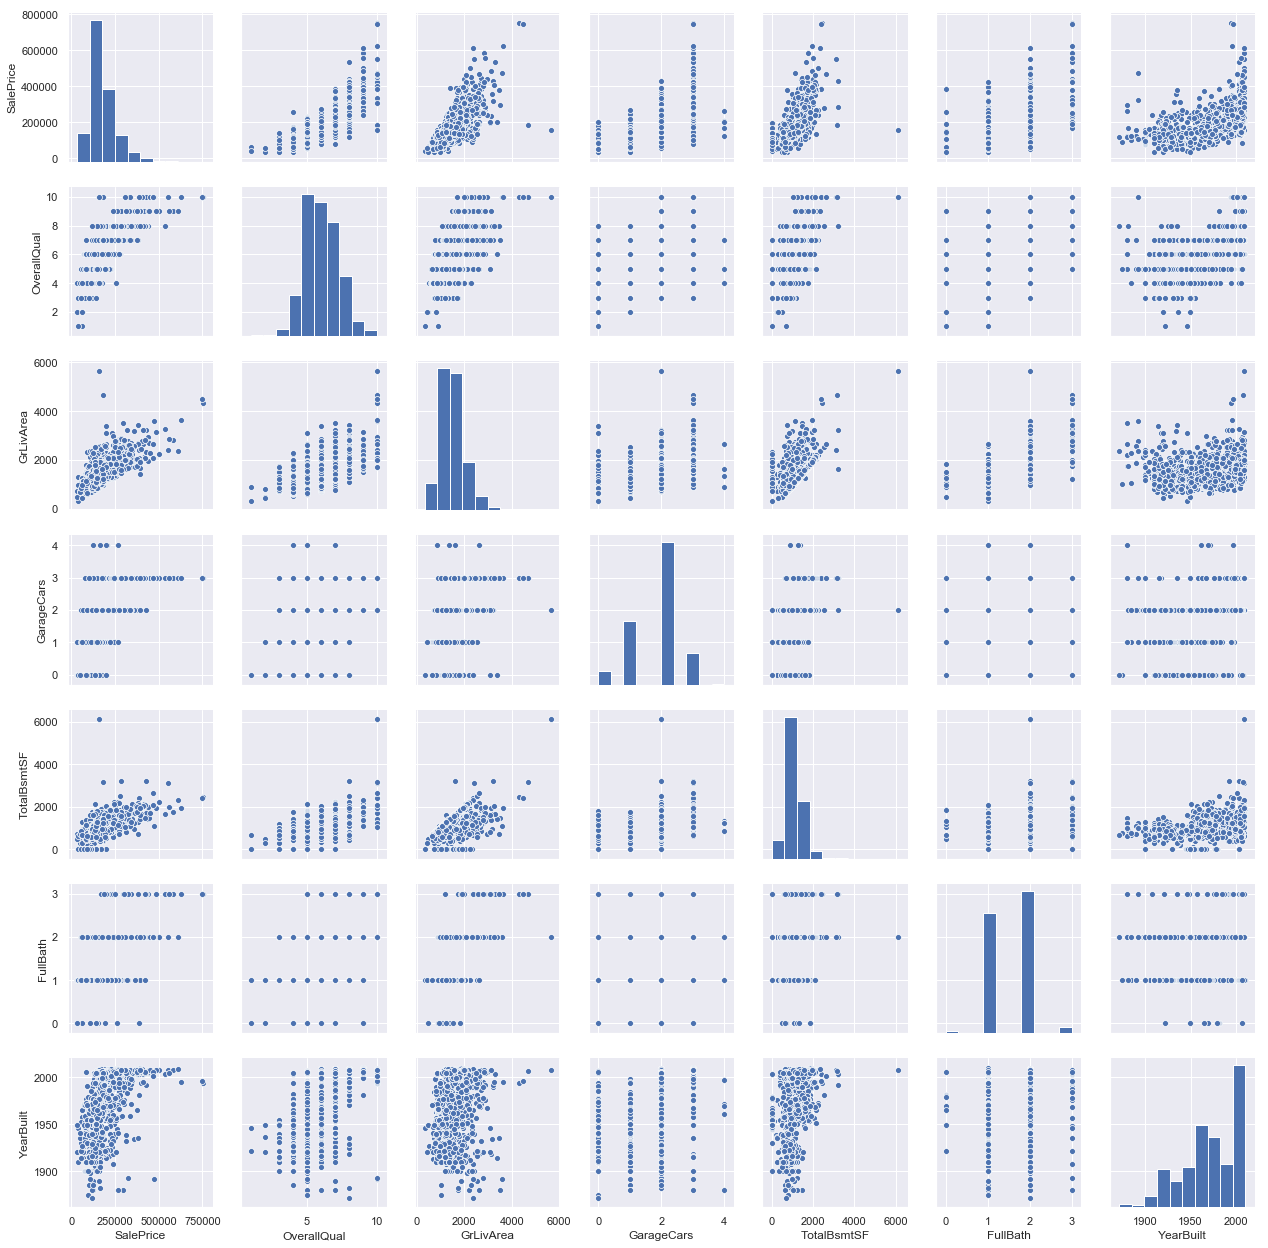

In [21]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

**Basic barchart**

In [ ]:
### conversion analysis based on country
country_ana=conversion_data.groupby([‘country’,’converted’])[‘country’].count().unstack()
country_ana.columns=[‘0’,’1']
country_ana[‘%’] = country_ana[‘1’]/country_ana.sum(axis=1)*100
ax = country_ana[‘%’].plot.bar()
ax.set_title(‘Conversion Rate by country’)
ax.set_ylabel(‘Conversion Rate (%)’)

**One-hot enconding for Categorical features**

In [121]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0 ,1])
# with drop_first=True it will also delete these columns and only keep the onehot enconded columns instead
pd.get_dummies(df_clean[type_dct["object"]],drop_first=True)

#Convert categorical variable into dummy variables
#df2=pd.get_dummies(df[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']])  

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
7,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
catdata=pd.get_dummies(cleaned_conv[[‘age_bin’,’country’,’source’]])
alldata = catdata.join(cleaned_conv[[‘new_user’,’total_pages_visited’,’converted’]])
x = alldata.drop(columns=’converted’)
y = alldata[‘converted’]

<h2>4. Feature engineering</h2>

**4.0 Log Transform skewed features**

In [364]:
from scipy.stats import skew

#log transform skewed numeric features:

#numeric_feats = df_clean.dtypes[(df_clean.dtypes != "object") or (df_clean.dtypes != "categorical")].index
def log_trans(df):
    numeric_feats = df.dtypes[(df.dtypes != 'category') & (df.dtypes != 'object')].index

    skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
    skewed_feats = skewed_feats[skewed_feats > 0.75]
    skewed_feats = skewed_feats.index

    df[skewed_feats] = np.log1p(df[skewed_feats])
    return df

X=log_trans(X)

In [365]:
# Log transform Test set:
X_test=log_trans(X_test)

**4.1 Spliting the data into Train-Validation-Test sets**

In [342]:
#Splitting the data 3 ways, altough it might not be the best solution using train_test_split twice, in terms of memory efficiency
from sklearn.model_selection import train_test_split

#x, x_test, y, y_test = train_test_split(xtrain,labels,test_size=0.2,train_size=0.8,random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.25,train_size =0.75,random_state=0)

X_train=pd.DataFrame(X_train, columns = X.columns)
X_valid=pd.DataFrame(X_valid, columns = X.columns)

**4.2 Scaling of features**

In [366]:
# Normalizing:
from sklearn.preprocessing import StandardScaler

# Normalize only numeric, non-dumym columns
type_dct = {str(k): list(v) for k, v in X.groupby(X.dtypes, axis=1)}

cols = (type_dct["int64"]+type_dct["float64"]) #all columns containing numeric data

# Scale the training set: (but I did not want to scale)
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])

#Scale the validation set:
X_valid[cols] = sc.fit_transform(X_valid[cols])

#Scale the validation set:
X_test[cols] = sc.fit_transform(X_test[cols])

#-----------------------------------------------------------
# Min-max scaling:
#scaler = MinMaxScaler()
#sdss = scaler.fit_transform(sdss_df_fe.drop('class', axis=1))

**4.2 Feature selection**

In [357]:

# Columns that are most correlated with the target variable, lets build first a simple model on them
#cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

#X_train=X_train[cols]
#X_valid=X_valid[cols]

#X = df[cols_selected].iloc[:,0:4].values    # features matrix 
#y = df[cols_selected]['crew'].values        # target variable4

cols=X_train.columns

X_test=df_test[cols]

X_test=X_test.fillna(X_test.mean())

# Check for NaN values:
X_test.isnull().sum(axis = 0).sort_values(ascending=False)

GarageYrBlt      0
MasVnrArea       0
OverallCond      0
LotArea          0
MSSubClass       0
YrSold           0
MoSold           0
GarageArea       0
GarageCars       0
Fireplaces       0
TotRmsAbvGrd     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtFullBath     0
YearRemodAdd     0
YearBuilt        0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
OpenPorchSF      0
LotFrontage      0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
WoodDeckSF       0
TotalBsmtSF      0
KitchenAbvGr     0
BsmtHalfBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
OverallQual      0
dtype: int64

In [147]:
print(X_train.shape)

(840, 36)
      MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
340     0.453903  0.961373     1.264068    -0.497382   0.948235      0.773141   
1307   -1.108423 -0.198643    -0.879574    -0.497382   0.692346      0.440461   
132    -1.108423 -0.380685    -0.879574     0.501974  -0.427167      0.773141   
454     1.039927  0.091846    -0.879574    -0.497382   0.116597     -0.462527   
790     1.457383 -2.112357     0.549521    -0.497382   1.044193      0.963244   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  EnclosedPorch  \
340    -1.380179   -0.344965   0.630326     0.082156  ...      -0.418896   
1307    0.821280   -0.344965  -0.156109     0.103660  ...      -0.418896   
132     0.618401   -0.344965   0.410241     0.168749  ...      -0.418896   
454     1.076182   -0.344965  -0.550521     0.613353  ...      -0.418896   
790    -0.437443   -0.344965   0.718896     0.236736  ...      -0.418896   

      3SsnPorch  ScreenPorch  PoolArea   MiscV

**Checking for NaN values for the last time before going into Modelling**

In [107]:
# Check for NaN values:
X.isnull().values.any()
X.isnull().sum().sum()

0

In [108]:
X.isnull().sum(axis = 0).sort_values(ascending=False)

GarageYrBlt      0
MasVnrArea       0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
FullBath         0
HalfBath         0
BedroomAbvGr     0
3SsnPorch        0
LotFrontage      0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
EnclosedPorch    0
KitchenAbvGr     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
TotRmsAbvGrd     0
MSSubClass       0
dtype: int64

<h2>5. Model Selection</h2>

**5.0 Cross-validation**

**5.1 Linear regression**

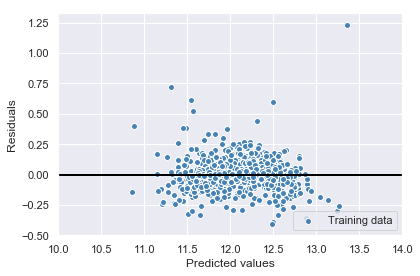

MSE train: 0.016, test: 0.028
R^2 train: 0.901, test: 0.803


In [179]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_valid_pred = slr.predict(X_valid)

# Visualize the residuals 
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_valid_pred,  y_valid_pred - y_valid,
             c='limegreen', marker='s', edgecolor='white',
             label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=10, xmax=14, color='black', lw=2)
plt.xlim([10, 14])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_valid, y_valid_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_valid, y_valid_pred)))


# Regression coefficients
#slr.fit(X_train, y_train).intercept_
#slr.fit(X_train, y_train).coef_

**3.2 Lasso regression (L1)**

In [176]:
np.min(y)

SalePrice    10.47195
dtype: float64

C:\Users\Peter\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
C:\Users\Peter\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Peter\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.726751916802393, tolerance: 0.013593715497660096
  positive)


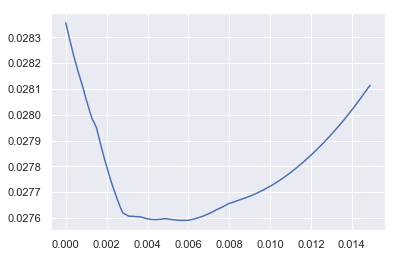

In [222]:
from sklearn.linear_model import Lasso

alpha=np.arange(0,0.015,0.0001)
mse_train=[]
mse_valid=[]
norm = []
for i in range(len(alpha)):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train,y_train)
    y_train_pre=lasso.predict(X_train)
    y_valid_pre=lasso.predict(X_valid)
    mse_train.append(mean_squared_error(y_train, y_train_pre))
    mse_valid.append(mean_squared_error(y_valid, y_valid_pre))
    norm= np.append(norm,np.linalg.norm(lasso.coef_))
    
    
# #Visualize R2 score vs regularization parameter:
# plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,mse_valid)
plt.show()
# plt.scatter(alpha,r2_test,label='r2_test')
# plt.plot(alpha,r2_test)
# plt.scatter(alpha,norm,label = 'norm')
# plt.plot(alpha,norm)
# plt.ylim(-0.1,1)
# plt.xlim(0,.43)
# plt.xlabel('alpha')
# plt.ylabel('R2_score')
# plt.legend()


In [223]:
lasso = Lasso(alpha=0.006)

lasso.fit(X_train,y_train)
y_train_pred=lasso.predict(X_train)
y_valid_pred=lasso.predict(X_valid)


In [224]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_valid, y_valid_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_valid, y_valid_pred)))

MSE train: 0.017, test: 0.028
R^2 train: 0.896, test: 0.808


In [353]:
# Lasso does automatic feature selection
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 23 variables and eliminated the other 13 variables


In [354]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5,1,'Coefficients in the Lasso Model')

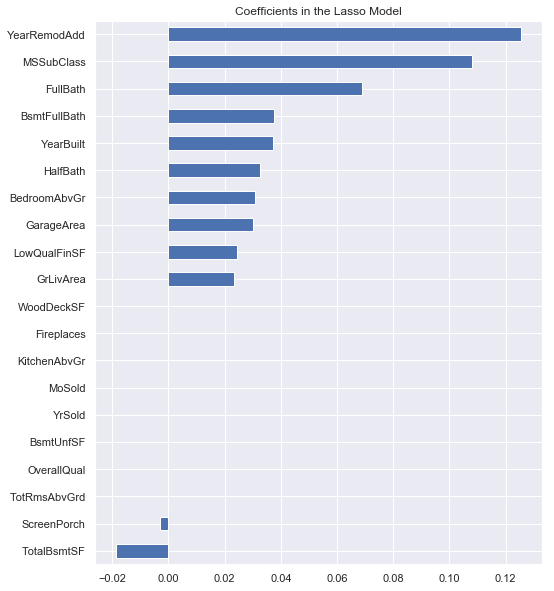

In [355]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

**Create Susmission for Kaggle**

In [391]:
# Model Predict
preds=np.exp(lasso.predict(X_test))
prediction = pd.DataFrame(df_test["Id"])
prediction["SalePrice"]=preds

prediction.to_csv('Submission.csv',index=False)

[109187.53524501 115684.268436   226959.24144984 ... 166499.85221716
 162484.28690997 230345.65633635]


In [183]:
# Visualize how the mean square error behaves 
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

(840, 1)

In [184]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

C:\Users\Peter\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Peter\Anaconda3\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=2.

In [151]:
# set up pipeline
from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])

IndentationError: unexpected indent (<ipython-input-151-34d40efd1faa>, line 3)

**3.3 Ridge Regression**

In [168]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1)

clf.fit(X_train,y_train)
y_train_rid_pred=clf.predict(X_train)
y_valid_rid_pred=clf.predict(X_valid)

In [173]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=2.

Text(0,0.5,'rmse')

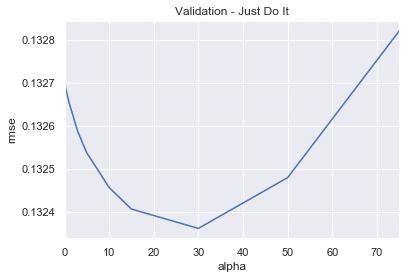

In [161]:
# Visualize how the mean square error behaves 
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [165]:
cv_ridge.min()

0.1323610381598505

In [167]:
np.power(0.1323610381598505,2)

0.017519444422753404

In [171]:
print('MSE train: %.4f, test: %.4f' % (
        mean_squared_error(y_train, y_train_rid_pred),
        mean_squared_error(y_valid, y_valid_rid_pred)))

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_rid_pred),
        r2_score(y_valid, y_valid_rid_pred)))

MSE train: 0.0160, test: 0.0284
R^2 train: 0.901, test: 0.802


**XGBOOST model**

In [395]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

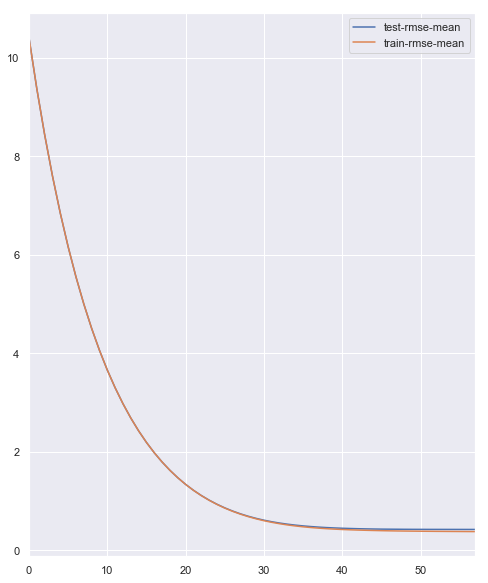

In [396]:
model.loc[0:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [419]:
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=3, learning_rate=0.05) #the params were tuned using xgb.cv

model_xgb.fit(X_train, y_train)

[20:24:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

**Have to add here some sort of Parameters search for Xgboost !!!!!!!!!!!!**

In [420]:
# Get the predictions from the
xg_preds=model_xgb.predict(X_valid)
print("Mean Squared Error : " + str(mean_squared_error(xg_preds, y_valid)))
#xgb_preds = np.expm1()


Mean Squared Error : 0.017651097091131634


**Make predictions:**

In [422]:
# Model Predict
preds=np.exp(model_xgb.predict(X_test))
prediction = pd.DataFrame(df_test["Id"])
prediction["SalePrice"]=preds

prediction.to_csv('Submission1.csv',index=False)

In [3]:
from xgboost import XGBRegressor,XGBClassifier

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

# make predictions
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

ModuleNotFoundError: No module named 'xgboost'

In [25]:
# XGBOOST model tuning

my_model = XGBRegressor(n_estimators=1000)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

NameError: name 'XGBRegressor' is not defined

In [24]:
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [ ]:
from sklearn.model_selection import GridSearchCV

# create a baseline
booster = xgb.XGBRegressor()

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

In [ ]:
# instantiate xgboost with best parameters
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=200, random_state=4)

# train
booster.fit(X_train, y_train)

# predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

In [ ]:
# Comparing perofrmance of ML models:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
## model selection 
base_models = [(“DT_model”, DecisionTreeClassifier(random_state=42)),
 (“RF_model”, RandomForestClassifier(random_state=42,n_jobs=-1)),
 (“LR_model”, LogisticRegression(random_state=42,n_jobs=-1))]
kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
for name, model in base_models:
# get cross validation score for each model:
 cv_results = cross_val_score(model, 
 x, y, 
 cv=split,
 scoring=”accuracy”,
 n_jobs=-1)
 # output:
 min_score = round(min(cv_results), 4)
 max_score = round(max(cv_results), 4)
 mean_score = round(np.mean(cv_results), 4)
 std_dev = round(np.std(cv_results), 4)
 print(f”{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}”)

**Grid search for finetuning model parameters**

In [ ]:
## choose logistic regression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
param_grid = {‘C’ : np.logspace(-4, 4, 20),
 }
gs = GridSearchCV(clf, param_grid = param_grid, cv = split, verbose=True, n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
gs.fit(x_train,y_train)

<h2>STEP DIMENSIONALITY REDUCTIO (PCA)</h2>

In [ ]:
for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))
    cum_variance = np.append(cum_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

**Cross validation for XGBoost**  
In order to build more robust models, it is common to conduct a k-fold cross validation where all the entries in the original training dataset are used for both training and validation. XGBoost supports k-fold cross validation via the cv method. All we have to do is specify the nfolds parameter, which is the number of cross validation rounds you want to build.  
We will have to first convert the dataset into an optimized data structure called DMatrix so that XGBoost's cross validation method is supported.

In [30]:
xg_train = xgb.DMatrix(data=X_train, label=y_train)

#using the previously optimized parameters:
params = {'colsample_bytree':0.6, 'gamma':0.2, 'learning_rate':0.05, 'max_depth':6}

cv_results = xgb.cv(dtrain=xg_train, params=params, nfold=3,
                    num_boost_round=200, early_stopping_rounds=10, 
                    metrics="rmse", as_pandas=True)

NameError: name 'xgb' is not defined

<h2>STEP Model evaluation</h2>

In [ ]:
#incase of CLASSIFICATION model:

y_pred_acc = gs.predict(x_test)
print(‘Accuracy Score : ‘ + str(accuracy_score(y_test,y_pred_acc)))
print(‘F1 Score : ‘ + str(f1_score(y_test,y_pred_acc)))
##Accuracy Score : 0.9858475648323846
##F1 Score : 0.7597315436241611

**Feature importance**

In [14]:
lr = LogisticRegression(random_state=42,n_jobs=-1)
lr.fit(x_train,y_train)
plt.figure(figsize=(10,5))
plt.bar(x.columns,lr.coef_[0])
plt.xticks(rotation=45)
plt.title(‘Feature Importance’)

importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

importances.plot.bar()

SyntaxError: invalid character in identifier (<ipython-input-14-7fac78e5fafb>, line 6)

<h2>STEP Computational times</h2>

In [15]:

# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [16]:
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000


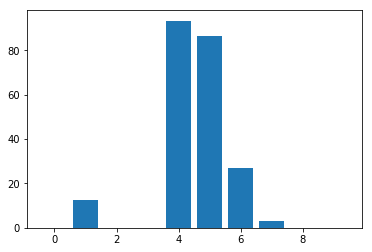

In [22]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# THis same apprach could be used for Ridge, Lasso and Elastic nets.


Feature: 0, Score: 0.16237
Feature: 1, Score: -0.64314
Feature: 2, Score: 0.48377
Feature: 3, Score: -0.46158
Feature: 4, Score: 0.18440
Feature: 5, Score: -0.11963
Feature: 6, Score: -0.40467
Feature: 7, Score: 0.03680
Feature: 8, Score: -0.51735
Feature: 9, Score: 0.26411


C:\Users\Peter\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


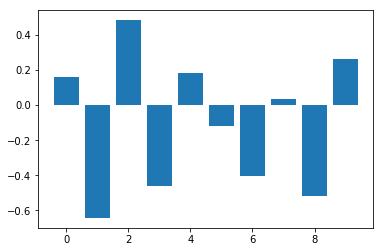

In [23]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()